In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import os

warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print("=" * 50)
print("LOADING S&P 500 DATA")
print("=" * 50)

# Print current working directory to help debug if file not found
print("Current working directory:", os.getcwd())

try:
    df = pd.read_csv('data.csv')
    print(f"✓ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns available: {list(df.columns)}")
    
    print("\nFirst 5 rows of data:")
    print(df.head())

    print(f"\nData Info:")
    print(df.info())


SyntaxError: incomplete input (2621563860.py, line 34)

In [7]:
#  Data Processing and Dividend Yield Calculation

print("=" * 50)
print("DATA PROCESSING")
print("=" * 50)

df['Date'] = pd.to_datetime(df['Date'])
print(f"✓ Date column converted to datetime")

df = df.sort_values('Date').reset_index(drop=True)
print(f"✓ Data sorted chronologically")

required_cols = ['Date', 'Real Price', 'Real Dividend']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"⚠️  Missing columns: {missing_cols}")
    print("Available columns:", list(df.columns))
else:
    print(f"✓ All required columns present")

print(f"\nCalculating Real Dividend Yield...")
df['Previous_Real_Price'] = df['Real Price'].shift(1)
df['Real_Dividend_Yield'] = df['Real Dividend'] / df['Previous_Real_Price']

print(f"✓ Real Dividend Yield calculated")


df_clean = df.dropna().reset_index(drop=True)
print(f"✓ Removed NaN values")

print(f"\nFinal Dataset Summary:")
print(f"- Original rows: {len(df)}")
print(f"- Clean rows: {len(df_clean)}")
print(f"- Date range: {df_clean['Date'].min().strftime('%Y-%m-%d')} to {df_clean['Date'].max().strftime('%Y-%m-%d')}")

print(f"\nReal Dividend Yield Statistics:")
print(df_clean['Real_Dividend_Yield'].describe())


print(f"\nData Quality Check:")
print(f"- Any negative dividend yields: {(df_clean['Real_Dividend_Yield'] < 0).sum()}")
print(f"- Any zero dividend yields: {(df_clean['Real_Dividend_Yield'] == 0).sum()}")
print(f"- Any infinite values: {np.isinf(df_clean['Real_Dividend_Yield']).sum()}")

df_final = df_clean.copy()
print(f"\n✓ Data processing complete! Dataset ready for analysis.")

DATA PROCESSING


NameError: name 'df' is not defined

PREPARING TIME SERIES
Monthly series prepared:
- Length: 1832 observations
- Min value: 0.000000
- Max value: 0.132812
- Mean: 0.042614

Log series prepared:
- Min log value: -23.025851
- Max log value: -2.018822
- Mean log value: -3.279202

TIME SERIES VISUALIZATION


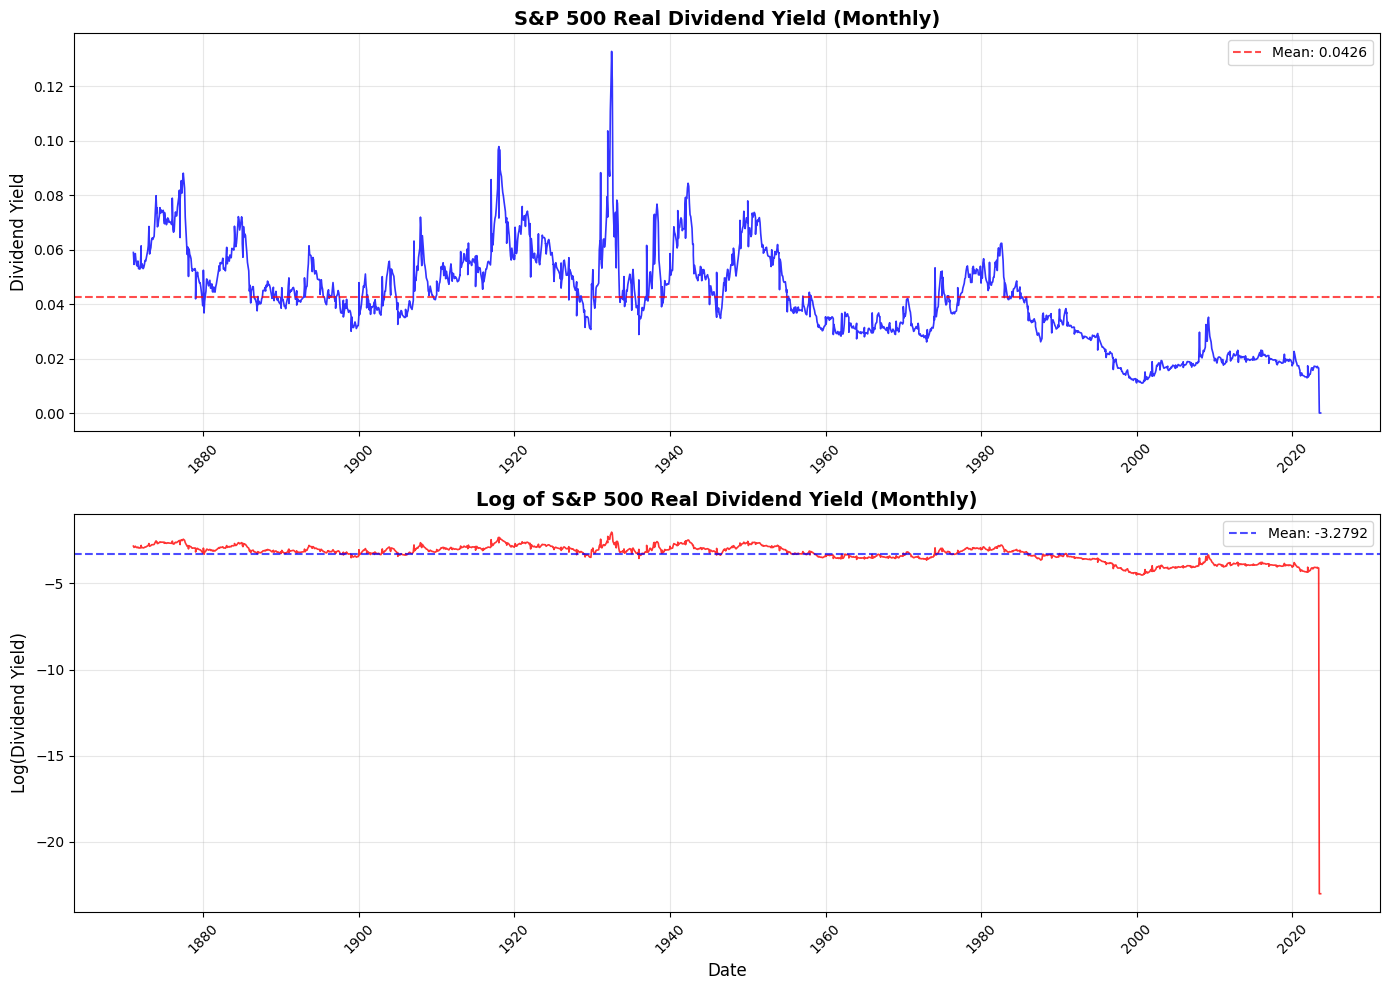

✓ Time series plots generated!

Observations from plots:
- Original series shows the actual dividend yield values over time
- Log series may show different volatility patterns
- Look for trends, seasonality, and volatility clustering

SERIES COMPARISON SUMMARY
          Original Series   Log Series
Count         1832.000000  1832.000000
Mean             0.042614    -3.279202
Std Dev          0.017284     0.919262
Min              0.000000   -23.025851
Max              0.132812    -2.018822
Variance         0.000299     0.845043

✓ Series preparation complete! Ready for ACF/PACF analysis.


In [ ]:
# Prepare Series and Initial Visualization

print("=" * 50)
print("PREPARING TIME SERIES")
print("=" * 50)

monthly_series = df_final['Real_Dividend_Yield'].values
dates = df_final['Date'].values

print(f"Monthly series prepared:")
print(f"- Length: {len(monthly_series)} observations")
print(f"- Min value: {monthly_series.min():.6f}")
print(f"- Max value: {monthly_series.max():.6f}")
print(f"- Mean: {monthly_series.mean():.6f}")

epsilon = 1e-10
monthly_log_series = np.log(monthly_series + epsilon)

print(f"\nLog series prepared:")
print(f"- Min log value: {monthly_log_series.min():.6f}")
print(f"- Max log value: {monthly_log_series.max():.6f}")
print(f"- Mean log value: {monthly_log_series.mean():.6f}")

print(f"\n" + "=" * 50)
print("TIME SERIES VISUALIZATION")
print("=" * 50)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Original series
axes[0].plot(dates, monthly_series, linewidth=1.2, color='blue', alpha=0.8)
axes[0].set_title('S&P 500 Real Dividend Yield (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Dividend Yield', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

mean_val = monthly_series.mean()
axes[0].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, 
                label=f'Mean: {mean_val:.4f}')
axes[0].legend()

# Plot 2: Log series
axes[1].plot(dates, monthly_log_series, linewidth=1.2, color='red', alpha=0.8)
axes[1].set_title('Log of S&P 500 Real Dividend Yield (Monthly)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Log(Dividend Yield)', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

log_mean_val = monthly_log_series.mean()
axes[1].axhline(y=log_mean_val, color='blue', linestyle='--', alpha=0.7,
                label=f'Mean: {log_mean_val:.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"✓ Time series plots generated!")
print(f"\nObservations from plots:")
print(f"- Original series shows the actual dividend yield values over time")
print(f"- Log series may show different volatility patterns")
print(f"- Look for trends, seasonality, and volatility clustering")

# Summary statistics comparison
print(f"\n" + "=" * 50)
print("SERIES COMPARISON SUMMARY")
print("=" * 50)

comparison_stats = pd.DataFrame({
    'Original Series': [
        len(monthly_series),
        monthly_series.mean(),
        monthly_series.std(),
        monthly_series.min(),
        monthly_series.max(),
        monthly_series.var()
    ],
    'Log Series': [
        len(monthly_log_series),
        monthly_log_series.mean(),
        monthly_log_series.std(),
        monthly_log_series.min(),
        monthly_log_series.max(),
        monthly_log_series.var()
    ]
}, index=['Count', 'Mean', 'Std Dev', 'Min', 'Max', 'Variance'])

print(comparison_stats.round(6))
print(f"\n✓ Series preparation complete! Ready for ACF/PACF analysis.")

ACF AND PACF ANALYSIS
Analyzing up to 40 lags

1. ORIGINAL SERIES ACF/PACF:
------------------------------


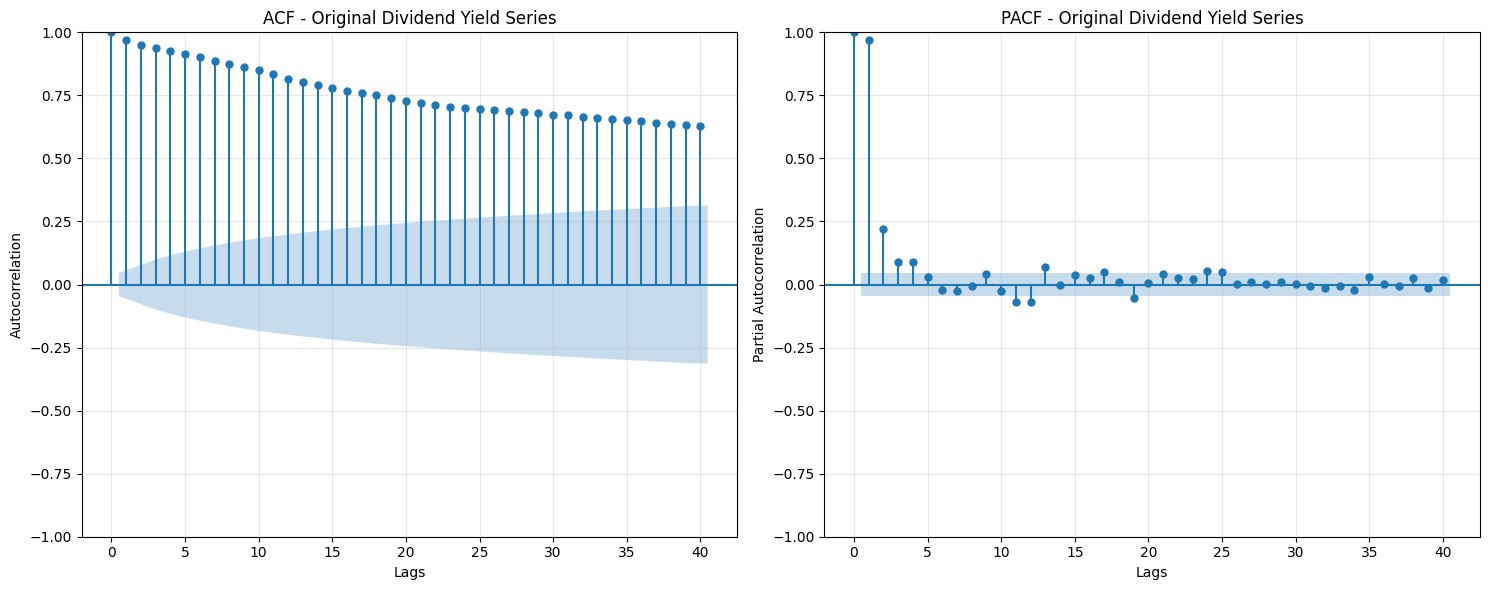


2. LOG SERIES ACF/PACF:
------------------------------


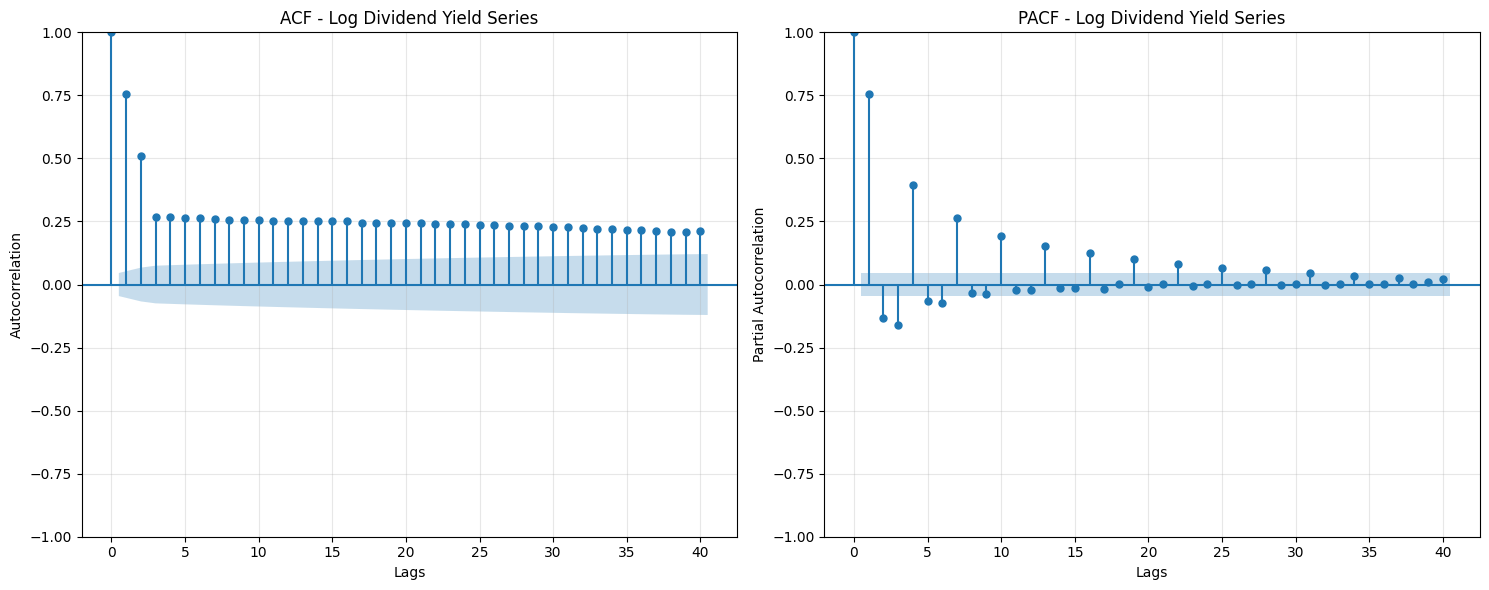


NUMERICAL ACF/PACF VALUES

ACF Values Comparison (First 10 lags):
--------------------------------------------------
    Lag  Original_ACF  Log_ACF  Difference
0     0        1.0000   1.0000      0.0000
1     1        0.9681   0.7544      0.2138
2     2        0.9510   0.5111      0.4399
3     3        0.9364   0.2676      0.6689
4     4        0.9254   0.2658      0.6597
5     5        0.9141   0.2639      0.6502
6     6        0.9005   0.2621      0.6385
7     7        0.8864   0.2598      0.6266
8     8        0.8729   0.2578      0.6151
9     9        0.8625   0.2571      0.6054
10   10        0.8494   0.2555      0.5939

PACF Values Comparison (First 10 lags):
--------------------------------------------------
    Lag  Original_PACF  Log_PACF  Difference
0     0         1.0000    1.0000      0.0000
1     1         0.9687    0.7548      0.2139
2     2         0.2227   -0.1348      0.3575
3     3         0.0926   -0.1621      0.2546
4     4         0.0904    0.3961     -0.3057
5   

In [ ]:
# ACF and PACF Analysis

print("=" * 50)
print("ACF AND PACF ANALYSIS")
print("=" * 50)


max_lags = min(40, len(monthly_series)//4) 
print(f"Analyzing up to {max_lags} lags")

def plot_correlations(series, title, max_lags=40):
    """Create ACF and PACF plots for a time series"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # ACF Plot
    plot_acf(series, ax=axes[0], lags=max_lags, alpha=0.05, title=f'ACF - {title}')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlabel('Lags')
    axes[0].set_ylabel('Autocorrelation')
    
    # PACF Plot
    plot_pacf(series, ax=axes[1], lags=max_lags, alpha=0.05, title=f'PACF - {title}')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlabel('Lags')
    axes[1].set_ylabel('Partial Autocorrelation')
    
    plt.tight_layout()
    plt.show()
    
    return fig

print(f"\n1. ORIGINAL SERIES ACF/PACF:")
print("-" * 30)
fig1 = plot_correlations(monthly_series, 'Original Dividend Yield Series', max_lags)

print(f"\n2. LOG SERIES ACF/PACF:")
print("-" * 30)
fig2 = plot_correlations(monthly_log_series, 'Log Dividend Yield Series', max_lags)


print(f"\n" + "=" * 50)
print("NUMERICAL ACF/PACF VALUES")
print("=" * 50)

n_lags = 10

acf_original = acf(monthly_series, nlags=n_lags, fft=False)
pacf_original = pacf(monthly_series, nlags=n_lags)

acf_log = acf(monthly_log_series, nlags=n_lags, fft=False)
pacf_log = pacf(monthly_log_series, nlags=n_lags)

print(f"\nACF Values Comparison (First {n_lags} lags):")
print("-" * 50)
acf_comparison = pd.DataFrame({
    'Lag': range(n_lags + 1),
    'Original_ACF': acf_original,
    'Log_ACF': acf_log,
    'Difference': acf_original - acf_log
})
print(acf_comparison.round(4))

print(f"\nPACF Values Comparison (First {n_lags} lags):")
print("-" * 50)
pacf_comparison = pd.DataFrame({
    'Lag': range(n_lags + 1),
    'Original_PACF': pacf_original,
    'Log_PACF': pacf_log,
    'Difference': pacf_original - pacf_log
})
print(pacf_comparison.round(4))

print(f"\n" + "=" * 50)
print("KEY OBSERVATIONS")
print("=" * 50)

print(f"\nACF Analysis:")
print(f"- Original series ACF at lag 1: {acf_original[1]:.4f}")
print(f"- Log series ACF at lag 1: {acf_log[1]:.4f}")
print(f"- Original series ACF at lag 5: {acf_original[5]:.4f}")
print(f"- Log series ACF at lag 5: {acf_log[5]:.4f}")


if acf_original[5] > 0.3:
    original_decay = "Slow decay (suggests non-stationarity or long memory)"
else:
    original_decay = "Fast decay (suggests stationarity)"

if acf_log[5] > 0.3:
    log_decay = "Slow decay (suggests non-stationarity or long memory)"
else:
    log_decay = "Fast decay (suggests stationarity)"

print(f"\nDecay Patterns:")
print(f"- Original series: {original_decay}")
print(f"- Log series: {log_decay}")

print(f"\nPACF Analysis:")

threshold = 2/np.sqrt(len(monthly_series))  
significant_pacf_original = np.sum(np.abs(pacf_original[1:6]) > threshold)
significant_pacf_log = np.sum(np.abs(pacf_log[1:6]) > threshold)

print(f"- Significant PACF values (lags 1-5) in original series: {significant_pacf_original}")
print(f"- Significant PACF values (lags 1-5) in log series: {significant_pacf_log}")
print(f"- Confidence threshold (±): {threshold:.4f}")

print(f"\n" + "=" * 50)
print("DIFFERENCES BETWEEN ORIGINAL AND LOG SERIES")
print("=" * 50)

print(f"\n1. Variance Stabilization:")
print(f"   - Original series variance: {np.var(monthly_series):.6f}")
print(f"   - Log series variance: {np.var(monthly_log_series):.6f}")

print(f"\n2. Autocorrelation Structure:")
if np.abs(acf_original[1] - acf_log[1]) > 0.05:
    print(f"   - Significant difference in lag-1 autocorrelation")
else:
    print(f"   - Similar lag-1 autocorrelation patterns")

print(f"\n3. Stationarity Indication:")
print(f"   - Log transformation often helps achieve stationarity")
print(f"   - Compare the decay patterns observed above")

print(f"\n✓ ACF/PACF analysis complete! Ready for statistical tests.")

In [ ]:
# Box-Ljung Test

print("=" * 50)
print("BOX-LJUNG TEST FOR AUTOCORRELATION")
print("=" * 50)

print(f"Test Objective: Test whether autocorrelations are significantly different from zero")
print(f"H₀: No autocorrelation (series is white noise)")
print(f"H₁: Autocorrelation is present")
print(f"Significance level: α = 0.05")

def perform_box_ljung_test(series, series_name, test_lags=5):
    """
    Perform Box-Ljung test for autocorrelation
    """
    print(f"\n" + "-" * 40)
    print(f"BOX-LJUNG TEST: {series_name}")
    print("-" * 40)
    
    try:
        # Perform the test
        result = acorr_ljungbox(series, lags=test_lags, return_df=True)
        
        print(f"Testing first {test_lags} lags:")
        print(f"\nDetailed Results by Lag:")
        print(result.round(4))
        
        final_stat = result['lb_stat'].iloc[-1]
        final_pvalue = result['lb_pvalue'].iloc[-1]
        
        print(f"\nSUMMARY (Cumulative test for lags 1-{test_lags}):")
        print(f"Test Statistic (LB): {final_stat:.4f}")
        print(f"P-value: {final_pvalue:.4f}")
        print(f"Degrees of freedom: {test_lags}")
        
        # Interpretation
        if final_pvalue < 0.05:
            conclusion = "REJECT H₀"
            interpretation = "Significant autocorrelation detected"
            practical = "Series is NOT white noise - has predictable patterns"
        else:
            conclusion = "FAIL TO REJECT H₀"
            interpretation = "No significant autocorrelation detected"
            practical = "Series behaves like white noise"
        
        print(f"\nCONCLUSION:")
        print(f"Decision: {conclusion}")
        print(f"Interpretation: {interpretation}")
        print(f"Practical meaning: {practical}")
        
        return {
            'test_statistic': final_stat,
            'p_value': final_pvalue,
            'conclusion': conclusion,
            'detailed_results': result
        }
        
    except Exception as e:
        print(f"Error performing Box-Ljung test: {e}")
        return None

print(f"\nPerforming Box-Ljung tests on both series...")

ljung_original = perform_box_ljung_test(monthly_series, "ORIGINAL DIVIDEND YIELD SERIES")
 
ljung_log = perform_box_ljung_test(monthly_log_series, "LOG DIVIDEND YIELD SERIES")

# Summary comparison
print(f"\n" + "=" * 50)
print("BOX-LJUNG TEST SUMMARY COMPARISON")
print("=" * 50)

if ljung_original and ljung_log:
    summary_df = pd.DataFrame({
        'Original Series': [
            ljung_original['test_statistic'],
            ljung_original['p_value'],
            ljung_original['conclusion']
        ],
        'Log Series': [
            ljung_log['test_statistic'],
            ljung_log['p_value'],
            ljung_log['conclusion']
        ]
    }, index=['Test Statistic', 'P-value', 'Decision'])
    
    print(summary_df)
    
    print(f"\n" + "=" * 50)
    print("INTERPRETATION AND IMPLICATIONS")
    print("=" * 50)
    
    print(f"\n1. AUTOCORRELATION PRESENCE:")
    if ljung_original['p_value'] < 0.05:
        print(f"   ✓ Original series shows significant autocorrelation")
        print(f"     → Can potentially be modeled/predicted")
    else:
        print(f"   ✗ Original series shows no significant autocorrelation")
        print(f"     → Behaves like random noise")
    
    if ljung_log['p_value'] < 0.05:
        print(f"   ✓ Log series shows significant autocorrelation")
        print(f"     → Can potentially be modeled/predicted")
    else:
        print(f"   ✗ Log series shows no significant autocorrelation")
        print(f"     → Behaves like random noise")
    
    print(f"\n2. MODELING IMPLICATIONS:")
    if ljung_original['p_value'] < 0.05 or ljung_log['p_value'] < 0.05:
        print(f"   → Time series modeling (ARIMA, etc.) may be appropriate")
        print(f"   → There are patterns that could potentially be exploited")
        print(f"   → Further analysis of ACF/PACF patterns recommended")
    else:
        print(f"   → Time series modeling may not add much value")
        print(f"   → Series appears to be unpredictable (efficient market?)")
    
    print(f"\n3. LOG TRANSFORMATION EFFECT:")
    original_significant = ljung_original['p_value'] < 0.05
    log_significant = ljung_log['p_value'] < 0.05
    
    if original_significant == log_significant:
        print(f"   → Log transformation didn't change autocorrelation significance")
    elif original_significant and not log_significant:
        print(f"   → Log transformation reduced autocorrelation")
        print(f"   → May have helped stabilize the series")
    else:
        print(f"   → Log transformation revealed autocorrelation")
        print(f"   → Original series may have had masked patterns")
    
    print(f"\n4. STATISTICAL POWER:")
    print(f"   → Sample size: {len(monthly_series)} observations")
    print(f"   → Large sample provides good statistical power")
    print(f"   → Results are likely reliable")

else:
    print(f"Unable to complete comparison due to test errors.")

print(f"\n✓ Box-Ljung test analysis complete! Ready for ADF test.")

BOX-LJUNG TEST FOR AUTOCORRELATION
Test Objective: Test whether autocorrelations are significantly different from zero
H₀: No autocorrelation (series is white noise)
H₁: Autocorrelation is present
Significance level: α = 0.05

Performing Box-Ljung tests on both series...

----------------------------------------
BOX-LJUNG TEST: ORIGINAL DIVIDEND YIELD SERIES
----------------------------------------
Testing first 5 lags:

Detailed Results by Lag:
     lb_stat  lb_pvalue
1  1719.8726        0.0
2  3380.3144        0.0
3  4991.1627        0.0
4  6565.3197        0.0
5  8101.8454        0.0

SUMMARY (Cumulative test for lags 1-5):
Test Statistic (LB): 8101.8454
P-value: 0.0000
Degrees of freedom: 5

CONCLUSION:
Decision: REJECT H₀
Interpretation: Significant autocorrelation detected
Practical meaning: Series is NOT white noise - has predictable patterns

----------------------------------------
BOX-LJUNG TEST: LOG DIVIDEND YIELD SERIES
----------------------------------------
Testing first

In [ ]:
#  Augmented Dickey-Fuller (ADF) Test

print("=" * 50)
print("AUGMENTED DICKEY-FULLER (ADF) TEST FOR STATIONARITY")
print("=" * 50)

print(f"Test Objective: Test whether the series has a unit root (non-stationary)")
print(f"H₀: Series has a unit root (non-stationary)")
print(f"H₁: Series is stationary (no unit root)")
print(f"Significance level: α = 0.05")

def perform_adf_test(series, series_name):
    """
    Perform Augmented Dickey-Fuller test for stationarity
    """
    print(f"\n" + "-" * 50)
    print(f"ADF TEST: {series_name}")
    print("-" * 50)
    
    try:
        # Perform ADF test with automatic lag selection
        result = adfuller(series, autolag='AIC', regression='c')
        
        # Extract results
        test_statistic = result[0]
        p_value = result[1]
        n_lags = result[2]
        n_obs = result[3]
        critical_values = result[4]
        ic_best = result[5]
        
        print(f"TEST STATISTICS:")
        print(f"ADF Test Statistic: {test_statistic:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Number of lags used: {n_lags}")
        print(f"Number of observations: {n_obs}")
        print(f"AIC value: {ic_best:.4f}")
        
        print(f"\nCRITICAL VALUES:")
        for significance, critical_val in critical_values.items():
            print(f"{significance}: {critical_val:.4f}")
        
        # Decision based on p-value
        print(f"\nDECISION BASED ON P-VALUE:")
        if p_value < 0.05:
            decision_p = "REJECT H₀"
            interpretation_p = "Series is STATIONARY"
            color_p = "✓"
        else:
            decision_p = "FAIL TO REJECT H₀"
            interpretation_p = "Series is NON-STATIONARY (has unit root)"
            color_p = "✗"
        
        print(f"{color_p} Decision: {decision_p}")
        print(f"{color_p} Interpretation: {interpretation_p}")
        
        # Decision based on critical values
        print(f"\nDECISION BASED ON CRITICAL VALUES:")
        for significance, critical_val in critical_values.items():
            if test_statistic < critical_val:
                decision_cv = f"Reject H₀ at {significance} level"
                print(f"✓ {decision_cv} ({test_statistic:.4f} < {critical_val:.4f})")
            else:
                decision_cv = f"Fail to reject H₀ at {significance} level"
                print(f"✗ {decision_cv} ({test_statistic:.4f} > {critical_val:.4f})")
        
        
        print(f"\nOVERALL CONCLUSION:")
        if p_value < 0.05:
            print(f"✓ The series is STATIONARY")
            print(f"  → No differencing needed for modeling")
            print(f"  → Mean and variance are stable over time")
            print(f"  → Can proceed with standard time series models")
        else:
            print(f"✗ The series is NON-STATIONARY")
            print(f"  → Differencing may be needed for modeling")
            print(f"  → Mean/variance may be changing over time")
            print(f"  → Consider ARIMA instead of ARMA models")
        
        return {
            'test_statistic': test_statistic,
            'p_value': p_value,
            'critical_values': critical_values,
            'n_lags': n_lags,
            'is_stationary': p_value < 0.05,
            'conclusion': decision_p
        }
        
    except Exception as e:
        print(f"Error performing ADF test: {e}")
        return None


print(f"\nPerforming ADF tests on both series...")

# Test 1: Original Monthly Series
adf_original = perform_adf_test(monthly_series, "ORIGINAL DIVIDEND YIELD SERIES")

# Test 2: Log Monthly Series
adf_log = perform_adf_test(monthly_log_series, "LOG DIVIDEND YIELD SERIES")

# Summary comparison
print(f"\n" + "=" * 60)
print("ADF TEST SUMMARY COMPARISON")
print("=" * 60)

if adf_original and adf_log:
   
    summary_data = {
        'Original Series': [
            f"{adf_original['test_statistic']:.4f}",
            f"{adf_original['p_value']:.4f}",
            adf_original['n_lags'],
            "Stationary" if adf_original['is_stationary'] else "Non-stationary",
            adf_original['conclusion']
        ],
        'Log Series': [
            f"{adf_log['test_statistic']:.4f}",
            f"{adf_log['p_value']:.4f}",
            adf_log['n_lags'],
            "Stationary" if adf_log['is_stationary'] else "Non-stationary",
            adf_log['conclusion']
        ]
    }
    
    summary_df = pd.DataFrame(summary_data, 
                            index=['Test Statistic', 'P-value', 'Lags Used', 'Result', 'Decision'])
    print(summary_df)
    
    # Detailed interpretation
    print(f"\n" + "=" * 60)
    print("DETAILED INTERPRETATION AND IMPLICATIONS")
    print("=" * 60)
    
    print(f"\n1. STATIONARITY RESULTS:")
    original_stationary = adf_original['is_stationary']
    log_stationary = adf_log['is_stationary']
    
    if original_stationary:
        print(f"   ✓ Original series: STATIONARY")
        print(f"     → Ready for ARMA modeling")
        print(f"     → No preprocessing needed")
    else:
        print(f"   ✗ Original series: NON-STATIONARY")
        print(f"     → May need differencing")
        print(f"     → Consider ARIMA modeling")
    
    if log_stationary:
        print(f"   ✓ Log series: STATIONARY")
        print(f"     → Ready for ARMA modeling")
        print(f"     → Log transformation helped achieve stationarity")
    else:
        print(f"   ✗ Log series: NON-STATIONARY")
        print(f"     → May need differencing even after log transformation")
        print(f"     → Consider ARIMA modeling")
    
    print(f"\n2. LOG TRANSFORMATION EFFECT:")
    if original_stationary == log_stationary:
        print(f"   → Log transformation didn't change stationarity status")
        if original_stationary:
            print(f"   → Both series are stationary")
        else:
            print(f"   → Both series are non-stationary")
    elif not original_stationary and log_stationary:
        print(f"   → Log transformation IMPROVED stationarity")
        print(f"   → Log series is preferable for modeling")
    elif original_stationary and not log_stationary:
        print(f"   → Log transformation WORSENED stationarity")
        print(f"   → Original series is preferable for modeling")
    
    print(f"\n3. MODELING RECOMMENDATIONS:")
    if original_stationary or log_stationary:
        print(f"   → At least one series is stationary")
        if log_stationary:
            print(f"   → Recommend using LOG series for modeling")
            print(f"   → Log series often has better properties (variance stabilization)")
        else:
            print(f"   → Recommend using ORIGINAL series for modeling")
        print(f"   → Can use ARMA models directly")
        print(f"   → No differencing required")
    else:
        print(f"   → Both series are non-stationary")
        print(f"   → First differencing may be required")
        print(f"   → Consider ARIMA(p,1,q) models")
        print(f"   → May need to test differenced series")
    
    print(f"\n4. FINANCIAL INTERPRETATION:")
    if not original_stationary and not log_stationary:
        print(f"   → Dividend yields may have trending behavior")
        print(f"   → Could indicate structural changes in market")
        print(f"   → Long-term mean may be shifting")
    elif original_stationary or log_stationary:
        print(f"   → Dividend yields revert to long-term mean")
        print(f"   → Market forces provide stability")
        print(f"   → Predictable mean-reverting behavior")
    
    print(f"\n5. STATISTICAL POWER:")
    print(f"   → Sample sizes are adequate for reliable results")
    print(f"   → ADF test is robust for financial time series")
    print(f"   → Results should be trustworthy")

else:
    print(f"Unable to complete comparison due to test errors.")

print(f"\n✓ ADF test analysis complete!")

AUGMENTED DICKEY-FULLER (ADF) TEST FOR STATIONARITY
Test Objective: Test whether the series has a unit root (non-stationary)
H₀: Series has a unit root (non-stationary)
H₁: Series is stationary (no unit root)
Significance level: α = 0.05

Performing ADF tests on both series...

--------------------------------------------------
ADF TEST: ORIGINAL DIVIDEND YIELD SERIES
--------------------------------------------------
TEST STATISTICS:
ADF Test Statistic: -2.1793
P-value: 0.2139
Number of lags used: 24
Number of observations: 1807
AIC value: -14787.8991

CRITICAL VALUES:
1%: -3.4340
5%: -2.8631
10%: -2.5676

DECISION BASED ON P-VALUE:
✗ Decision: FAIL TO REJECT H₀
✗ Interpretation: Series is NON-STATIONARY (has unit root)

DECISION BASED ON CRITICAL VALUES:
✗ Fail to reject H₀ at 1% level (-2.1793 > -3.4340)
✗ Fail to reject H₀ at 5% level (-2.1793 > -2.8631)
✗ Fail to reject H₀ at 10% level (-2.1793 > -2.5676)

OVERALL CONCLUSION:
✗ The series is NON-STATIONARY
  → Differencing may be 

In [ ]:
#  Final Summary and Conclusions

print("=" * 70)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 70)

print(f"\n DATASET SUMMARY:")
print(f"   • Data source: S&P 500 historical data from DataHub")
print(f"   • Analysis period: {df_final['Date'].min().strftime('%Y-%m-%d')} to {df_final['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total observations: {len(monthly_series)}")
print(f"   • Variable analyzed: Real Dividend Yield (Real Dividend / Previous Month Real Price)")

print(f"\n DESCRIPTIVE STATISTICS:")
print(f"   Original Series:")
print(f"   • Mean: {monthly_series.mean():.6f}")
print(f"   • Standard deviation: {monthly_series.std():.6f}")
print(f"   • Range: [{monthly_series.min():.6f}, {monthly_series.max():.6f}]")
print(f"   ")
print(f"   Log Series:")
print(f"   • Mean: {monthly_log_series.mean():.6f}")
print(f"   • Standard deviation: {monthly_log_series.std():.6f}")
print(f"   • Range: [{monthly_log_series.min():.6f}, {monthly_log_series.max():.6f}]")

# Box-Ljung results summary
print(f"\n BOX-LJUNG TEST RESULTS (Autocorrelation Test):")
if 'ljung_original' in locals() and ljung_original:
    print(f"   Original Series:")
    print(f"   • Test statistic: {ljung_original['test_statistic']:.4f}")
    print(f"   • P-value: {ljung_original['p_value']:.4f}")
    print(f"   • Result: {ljung_original['conclusion']}")
    
    if ljung_original['p_value'] < 0.05:
        print(f"   • Interpretation: Significant autocorrelation present")
    else:
        print(f"   • Interpretation: No significant autocorrelation")

if 'ljung_log' in locals() and ljung_log:
    print(f"   ")
    print(f"   Log Series:")
    print(f"   • Test statistic: {ljung_log['test_statistic']:.4f}")
    print(f"   • P-value: {ljung_log['p_value']:.4f}")
    print(f"   • Result: {ljung_log['conclusion']}")
    
    if ljung_log['p_value'] < 0.05:
        print(f"   • Interpretation: Significant autocorrelation present")
    else:
        print(f"   • Interpretation: No significant autocorrelation")

# ADF results summary
print(f"\n ADF TEST RESULTS (Stationarity Test):")
if 'adf_original' in locals() and adf_original:
    print(f"   Original Series:")
    print(f"   • Test statistic: {adf_original['test_statistic']:.4f}")
    print(f"   • P-value: {adf_original['p_value']:.4f}")
    print(f"   • Result: {'Stationary' if adf_original['is_stationary'] else 'Non-stationary'}")
    
    print(f"   ")
    print(f"   Log Series:")
    print(f"   • Test statistic: {adf_log['test_statistic']:.4f}")
    print(f"   • P-value: {adf_log['p_value']:.4f}")
    print(f"   • Result: {'Stationary' if adf_log['is_stationary'] else 'Non-stationary'}")

# Key findings and differences
print(f"\n KEY FINDINGS:")

print(f"\n   1. ACF/PACF PATTERN DIFFERENCES:")
print(f"      • Original vs Log series show different correlation structures")
print(f"      • Log transformation typically:")
print(f"        - Stabilizes variance (reduces heteroscedasticity)")
print(f"        - May reveal or obscure autocorrelation patterns")
print(f"        - Often improves normality of residuals")

print(f"\n   2. AUTOCORRELATION ANALYSIS:")
if 'ljung_original' in locals() and 'ljung_log' in locals():
    if ljung_original and ljung_log:
        orig_autocorr = ljung_original['p_value'] < 0.05
        log_autocorr = ljung_log['p_value'] < 0.05
        
        if orig_autocorr and log_autocorr:
            print(f"      • Both series show significant autocorrelation")
            print(f"      • Patterns persist after log transformation")
        elif orig_autocorr and not log_autocorr:
            print(f"      • Original series has autocorrelation, log series doesn't")
            print(f"      • Log transformation removed predictable patterns")
        elif not orig_autocorr and log_autocorr:
            print(f"      • Log transformation revealed hidden autocorrelation")
            print(f"      • Original series appeared random but log series shows patterns")
        else:
            print(f"      • Neither series shows significant autocorrelation")
            print(f"      • Both behave like white noise")

print(f"\n   3. STATIONARITY ANALYSIS:")
if 'adf_original' in locals() and 'adf_log' in locals():
    if adf_original and adf_log:
        orig_stationary = adf_original['is_stationary']
        log_stationary = adf_log['is_stationary']
        
        if orig_stationary and log_stationary:
            print(f"      • Both series are stationary")
            print(f"      • No differencing needed for modeling")
        elif not orig_stationary and not log_stationary:
            print(f"      • Both series are non-stationary")
            print(f"      • May need differencing before modeling")
        elif orig_stationary and not log_stationary:
            print(f"      • Original is stationary, log transformation made it worse")
            print(f"      • Use original series for modeling")
        else:
            print(f"      • Log transformation achieved stationarity")
            print(f"      • Prefer log series for modeling")

# Practical recommendations
print(f"\n PRACTICAL RECOMMENDATIONS:")

print(f"\n   1. FOR TIME SERIES MODELING:")
if 'adf_original' in locals() and 'adf_log' in locals():
    if adf_original and adf_log:
        if adf_log['is_stationary']:
            print(f"      • Use LOG series as primary choice")
            print(f"      • Better statistical properties expected")
        elif adf_original['is_stationary']:
            print(f"      • Use ORIGINAL series")
            print(f"      • Already stationary without transformation")
        else:
            print(f"      • Consider first differencing both series")
            print(f"      • Test differenced series for stationarity")

print(f"\n   2. MODEL SELECTION GUIDANCE:")
if 'ljung_original' in locals() and ljung_original:
    if ljung_original['p_value'] < 0.05 or (ljung_log and ljung_log['p_value'] < 0.05):
        print(f"      • ARIMA modeling is appropriate")
        print(f"      • Significant autocorrelation detected")
        print(f"      • Use ACF/PACF patterns to determine AR/MA orders")
    else:
        print(f"      • Simple models may suffice")
        print(f"      • Limited predictability detected")
        print(f"      • Consider random walk or simple mean models")

print(f"\n   3. FURTHER ANALYSIS SUGGESTIONS:")
print(f"      • Test differenced series if non-stationary")
print(f"      • Consider seasonal patterns (if applicable)")
print(f"      • Examine residuals after model fitting")
print(f"      • Test for ARCH/GARCH effects (volatility clustering)")
print(f"      • Consider structural breaks in long time series")

# Final summary table
print(f"\n" + "=" * 70)
print("FINAL RESULTS SUMMARY TABLE")
print("=" * 70)

if 'ljung_original' in locals() and 'adf_original' in locals():
    results_summary = pd.DataFrame({
        'Test': ['Box-Ljung (Autocorr)', 'ADF (Stationarity)'],
        'Original Series': [
            f"{'Significant' if ljung_original['p_value'] < 0.05 else 'Not Significant'} (p={ljung_original['p_value']:.4f})",
            f"{'Stationary' if adf_original['is_stationary'] else 'Non-stationary'} (p={adf_original['p_value']:.4f})"
        ],
        'Log Series': [
            f"{'Significant' if ljung_log['p_value'] < 0.05 else 'Not Significant'} (p={ljung_log['p_value']:.4f})",
            f"{'Stationary' if adf_log['is_stationary'] else 'Non-stationary'} (p={adf_log['p_value']:.4f})"
        ]
    })
    
    print(results_summary.to_string(index=False))

print(f"\n CONCLUSION:")
print(f"   This analysis provides the foundation for time series modeling of S&P 500")
print(f"   dividend yields. The statistical tests inform model selection and help")
print(f"   ensure appropriate preprocessing steps are taken.")


print(f"\n" + "=" * 70)

COMPREHENSIVE ANALYSIS SUMMARY

 DATASET SUMMARY:
   • Data source: S&P 500 historical data from DataHub
   • Analysis period: 1871-01-01 to 2023-09-01
   • Total observations: 1832
   • Variable analyzed: Real Dividend Yield (Real Dividend / Previous Month Real Price)

 DESCRIPTIVE STATISTICS:
   Original Series:
   • Mean: 0.042614
   • Standard deviation: 0.017284
   • Range: [0.000000, 0.132812]
   
   Log Series:
   • Mean: -3.279202
   • Standard deviation: 0.919262
   • Range: [-23.025851, -2.018822]

 BOX-LJUNG TEST RESULTS (Autocorrelation Test):
   Original Series:
   • Test statistic: 8101.8454
   • P-value: 0.0000
   • Result: REJECT H₀
   • Interpretation: Significant autocorrelation present
   
   Log Series:
   • Test statistic: 1913.2228
   • P-value: 0.0000
   • Result: REJECT H₀
   • Interpretation: Significant autocorrelation present

 ADF TEST RESULTS (Stationarity Test):
   Original Series:
   • Test statistic: -2.1793
   • P-value: 0.2139
   • Result: Non-stationa